<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/backtesting_denoising_clustering_portfolio_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to pdf /content/GWP_3_4981.ipynb

[NbConvertApp] WARNING | pattern '/content/GWP_3_4981.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe

## Introducton


This groundbreaking study builds upon the foundation laid by Group 2's portfolio optimization inquiries, delving into the intricate world of asset allocation across five key entities: Microsoft, Toyota Motors, Amazon, Apple, and Google. However, this investigation transcends conventional approaches by integrating advanced techniques such as backtesting, denoising, and k-means clustering. With a resolute commitment to enhancing portfolio performance and elevating the prowess of portfolio managers at large, this endeavor seeks to unlock new dimensions of efficiency and effectiveness in the realm of investment management.

# Step 1

In [ ]:
 ! pip install yfinance pandas cvxpy matplotlib


#### Importing packages

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Download dataset from yahoo finance and compute log returns

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of stock symbols
symbols = ["MSFT", "TM", "AMZN", "AAPL", "GOOGL"]

# Define the date range
start_date = "2014-01-01"
end_date = "2018-01-01"

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
returns = np.log(1 + data.pct_change().dropna())

# Number of assets
n_assets = len(symbols)


[*********************100%%**********************]  5 of 5 completed


#### Compute weights,portfolio_returns and portfolio_risk





In [ ]:
# Create a function to calculate portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-7-c11a51fe9065>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=

In [ ]:
# Create a function to calculate portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-8-c11a51fe9065>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=

#### Portfolio

In [ ]:
# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]

# Find the portfolio with the minimum risk
min_risk_portfolio = portfolios.iloc[portfolios['Risk'].idxmin()]

# Display the optimal solutions
print("Optimal Portfolio - Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, max_sharpe_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")

print("\nOptimal Portfolio - Minimum Risk:")
print(min_risk_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, min_risk_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")


Optimal Portfolio - Maximum Sharpe Ratio:
Return                                                   0.230478
Risk                                                     0.183593
Sharpe Ratio                                             1.255376
Weights         [0.3152967490215738, 0.22084532352093963, 0.01...
Name: 8192, dtype: object

Companies in the Optimal Portfolio:
MSFT: 0.3153
TM: 0.2208
AMZN: 0.0190
AAPL: 0.4313
GOOGL: 0.0136

Optimal Portfolio - Minimum Risk:
Return                                                   0.125298
Risk                                                     0.153382
Sharpe Ratio                                             0.816898
Weights         [0.189504490856351, 0.011456242838791283, 0.17...
Name: 18966, dtype: object

Companies in the Optimal Portfolio:
MSFT: 0.1895
TM: 0.0115
AMZN: 0.1796
AAPL: 0.1587
GOOGL: 0.4607


#### Plot the effcient frontier



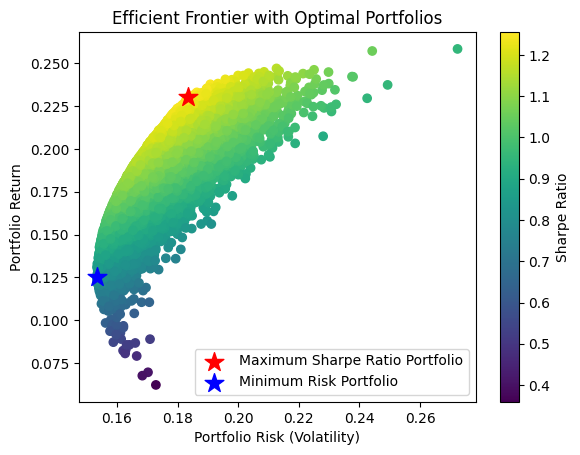

In [ ]:
# Plot the efficient frontier
plt.scatter(portfolios.Risk, portfolios.Return, c=portfolios['Sharpe Ratio'], cmap='viridis', marker='o')
plt.title('Efficient Frontier with Optimal Portfolios')
plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio.Risk, max_sharpe_portfolio.Return, marker='*', color='r', s=200, label='Maximum Sharpe Ratio Portfolio')
plt.scatter(min_risk_portfolio.Risk, min_risk_portfolio.Return, marker='*', color='b', s=200, label='Minimum Risk Portfolio')
plt.legend()
plt.show()

#### Covariance Matrix

In [ ]:
! pip install seaborn matplotlib

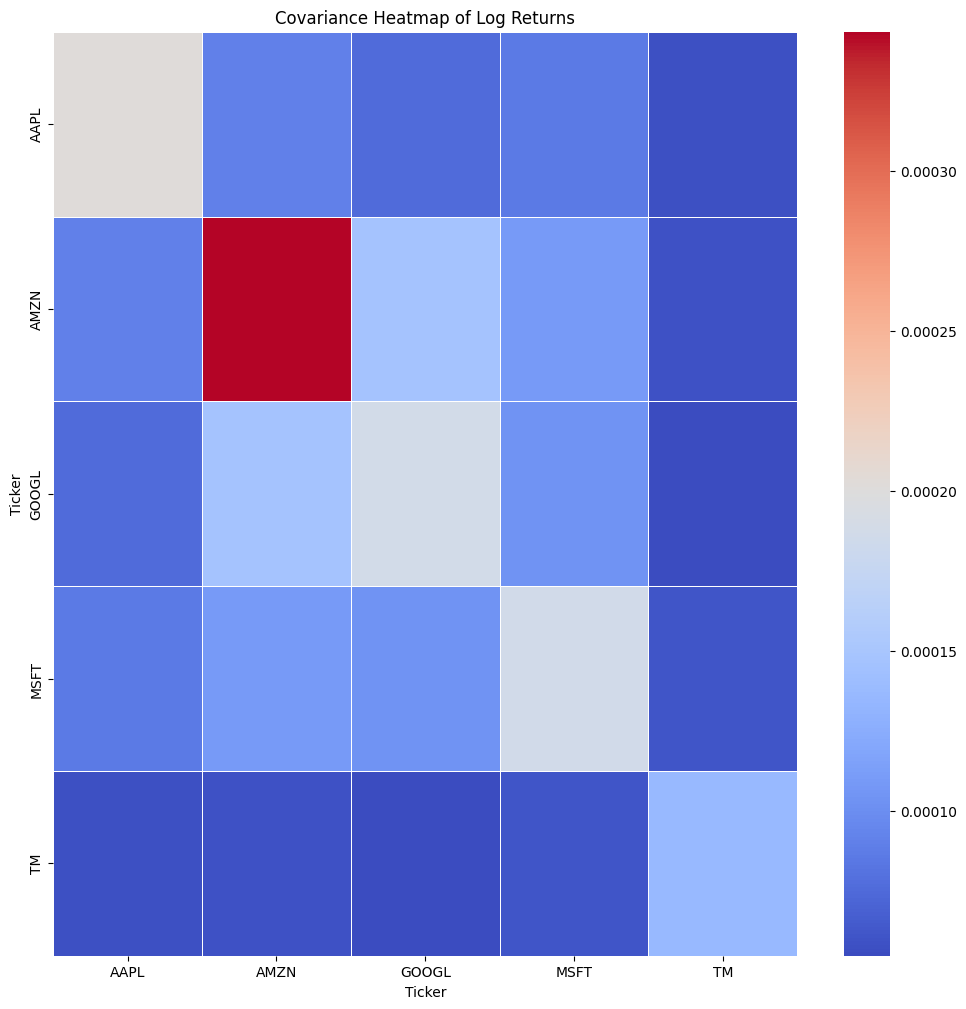

In [ ]:
import seaborn as sns
cov_matrix =returns.cov()
# Create a heatmap of the covariance matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Covariance Heatmap of Log Returns")
plt.show()


#### Correlation Matrix

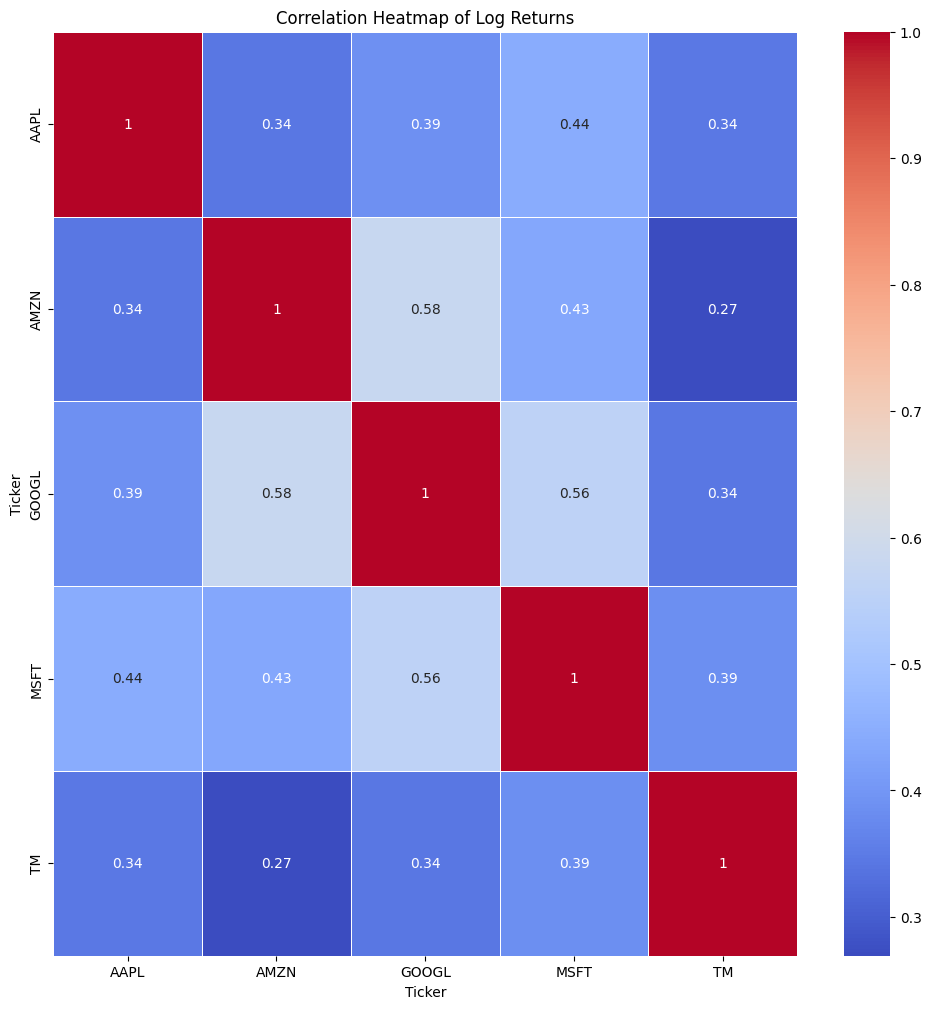

In [ ]:
corr_matrix = returns.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Log Returns")
plt.show()

# Step 2

In [ ]:
import yfinance as yf
from scipy.optimize import minimize
import cvxpy as cp
import matplotlib.pyplot as plt

# Function to download data from Yahoo Finance
def download_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]
    return data

# Function to calculate log returns
def calculate_returns(data):
    returns = np.log(data / data.shift(1)).dropna()
    return returns

# Function to implement Black-Litterman portfolio
def black_litterman_portfolio(returns, market_cap_weights, tau, views, P, omega):
    risk_free_rate = 0.01  # replace with the actual risk-free rate

    # Calculate equilibrium excess returns
    market_prices = returns["^GSPC"]
    market_returns = np.log(market_prices / market_prices.shift(1)).dropna()
    market_equilibrium_return = risk_free_rate + market_returns.mean()
    covariance_matrix = returns.cov()
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    equilibrium_excess_returns = np.dot(inverse_covariance_matrix, market_equilibrium_return)

    # Calculate Black-Litterman adjusted expected returns
    adjusted_excess_returns = np.dot(np.linalg.inv(np.dot(np.dot(P.T, np.linalg.inv(tau * covariance_matrix)), P) + np.linalg.inv(omega)),
                                     np.dot(np.dot(P.T, np.linalg.inv(tau * covariance_matrix)), views))
    bl_expected_returns = equilibrium_excess_returns + adjusted_excess_returns

    # Optimize portfolio using Black-Litterman expected returns
    n_assets = len(returns.columns)
    weights = cp.Variable(n_assets)
    objective = cp.Maximize(bl_expected_returns.T @ weights)
    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Quadratic utility function for the objective
    # Adjust this based on investor risk aversion
    # You may also use a different risk function as per your preference
    utility = cp.quad_form(weights, covariance_matrix)
    constraints.append(utility <= 0.002)  # You can adjust this constraint

    problem = cp.Problem(objective, constraints)
    problem.solve()

    optimal_weights = weights.value
    return optimal_weights

# Function to plot efficient frontier with and without Black-Litterman
def plot_efficient_frontiers(bl_weights, returns, risk_free_rate):
    n_portfolios = 100
    portfolio_weights = np.zeros((n_portfolios, len(returns.columns)))
    portfolio_returns = np.zeros(n_portfolios)
    portfolio_volatility = np.zeros(n_portfolios)

    for i in range(n_portfolios):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        portfolio_weights[i, :] = weights

        portfolio_returns[i] = np.dot(weights, returns.mean()) * 252  # Annualize returns
        portfolio_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    bl_portfolio_returns = np.dot(bl_weights, returns.mean()) * 252
    bl_portfolio_volatility = np.sqrt(np.dot(bl_weights.T, np.dot(returns.cov() * 252, bl_weights)))

    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_volatility, portfolio_returns, label='Efficient Frontier', alpha=0.5)
    plt.scatter(bl_portfolio_volatility, bl_portfolio_returns, label='Black-Litterman Portfolio', color='red', marker='o')
    plt.title('Efficient Frontier Comparison with Black-Litterman')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Step 1: Download data from Yahoo Finance
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "^GSPC"]  # Include S&P 500 as the market
start_date = "2022-01-01"
end_date = "2023-01-01"

data = download_data(symbols, start_date, end_date)

# Step 2: Calculate log returns
returns = calculate_returns(data)

# Step 3: Use S&P 500 as market cap weights
market_cap_weights = [0.15, 0.15, 0.15, 0.15, 0.15, 0.25]  # Adjust weights based on market cap

# Step 4: Implement Black-Litterman portfolio
tau = 0.025  # Tau parameter for Black-Litterman
views = np.array([0.02, -0.01, 0.03, 0.01, -0.02])  # Example views
P = np.eye(len(symbols))[:5]


[*********************100%%**********************]  6 of 6 completed


Code 2

In [ ]:
! pip install numpy pandas PyPortfolioOpt yfinance matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.2 MB/s eta 0:00:00




```
# This is formatted as code
```

# Step 3 and 4 our work

In [ ]:
# Install necessary packages
!pip install yfinance pandas numpy scipy cvxpy matplotlib


[*********************100%%**********************]  5 of 5 completed


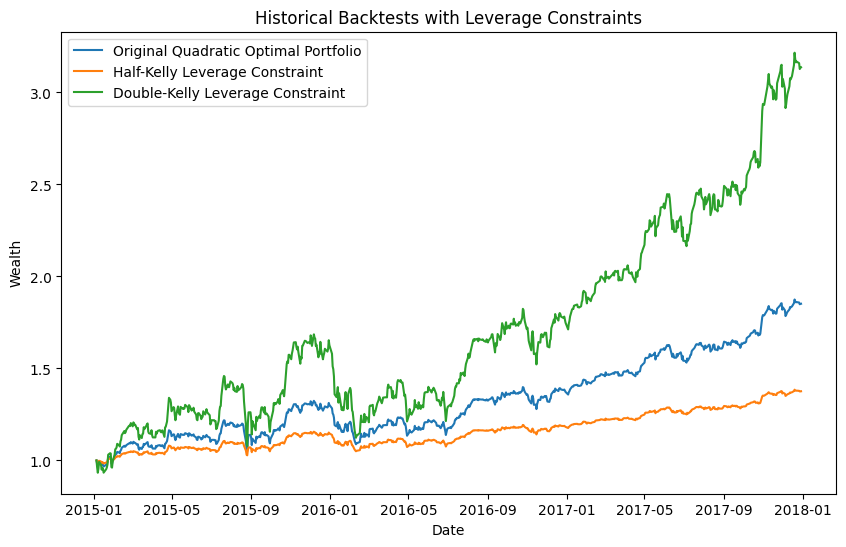

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Download dataset from Yahoo Finance
symbols = ["MSFT", "TM", "AMZN", "AAPL", "GOOGL"]
start_date = "2015-01-01"
end_date = "2018-01-01"

# Download historical data
asset_prices = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# 2. Compute log asset returns and remove NA
asset_returns = np.log(asset_prices / asset_prices.shift(1)).dropna()

# 3. Perform historical backtests
def historical_backtest(log_returns, weights):
    wealth = [1.0]
    for i in range(1, len(log_returns)):
        portfolio_return = np.dot(log_returns.iloc[i - 1], weights)
        wealth.append(wealth[-1] * (1 + portfolio_return))
    return pd.Series(wealth, index=log_returns.index)

# 4. Plot historical backtests
plt.figure(figsize=(10, 6))

# 4.1. Original Quadratic Optimal Portfolio
weights_optimal = np.ones(len(symbols)) / len(symbols)  # Equal weights for simplicity
wealth_optimal = historical_backtest(asset_returns, weights_optimal)
plt.plot(asset_returns.index, wealth_optimal, label='Original Quadratic Optimal Portfolio')

# 4.2. Leverage Constraint Smaller than Kelly (Half-Kelly)
leverage_half_kelly = 0.5
weights_half_kelly = weights_optimal * leverage_half_kelly
wealth_half_kelly = historical_backtest(asset_returns, weights_half_kelly)
plt.plot(asset_returns.index, wealth_half_kelly, label='Half-Kelly Leverage Constraint')

# 4.3. Leverage Constraint Larger than Kelly (Double-Kelly)
leverage_double_kelly = 2.0
weights_double_kelly = weights_optimal * leverage_double_kelly
wealth_double_kelly = historical_backtest(asset_returns, weights_double_kelly)
plt.plot(asset_returns.index, wealth_double_kelly, label='Double-Kelly Leverage Constraint')

# Plotting settings
plt.xlabel('Date')
plt.ylabel('Wealth')
plt.title('Historical Backtests with Leverage Constraints')
plt.legend()
plt.show()


#Group Work Project 3

## Improvements using Backtesting

In [ ]:
! pip install nsepy

  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36058 sha256=945cfdf43a8eb5b15a6a0ea5fdb2888ab51ecfb6dfa69059a9a598ed76e95011
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
import nsepy
from statistics import mean

In [ ]:
# get daily data from yfinance
def get_daily_data(symbol, start, end):
    data = yf.download(tickers=symbol, start=start, end=end)
    # data = nsepy.get_history(symbol=symbol, start=start, end=end)
    return data

# moving averages strategy on close price data
# [!] implement any strategy you like across all stocks in your portfolio
def ma(data,ma1,ma2):
    # calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['Close'].ewm(span=ma2).mean().shift()

    # creating positions
    # data["position"] = [0]*len(data)
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)
    data["strategy_returns"] = data["bnh_returns"] * data["position"]

    # returning strategy returns
    return data["strategy_returns"]

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

#  Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

In [ ]:
# backtesting parameters
days = 2000
end = dt.today()
start = end - pd.Timedelta(days=days)

# portfolio of stocks
portfolio_stocks = ["AAPL", "AMZN", "GOOGL", "MSFT", "TM",]

# defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_bnh_returns = pd.DataFrame()

# buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

# iterating over stocks in the portfolio
for stock in portfolio_stocks:
    data = get_daily_data(stock, start, end)

    # Calcuulating daily returns
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())

    portfolio_strategy_returns[stock] = ma(data,ma1 = 3, ma2 = 8)

    bnh_stock_returns.append(get_cumulative_return(data["strategy_returns"]))
    bnh_stock_sharpe.append(get_annualized_sharpe_ratio(data["strategy_returns"]))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,AAPL,AMZN,GOOGL,MSFT,TM,Portfolio_rets
Date,,,,,,
2018-10-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-05,-0.0000,-0.0,-0.0,-0.0000,-0.0,0.0000
2018-10-08,-0.0000,-0.0,-0.0,-0.0000,0.0,0.0000
2018-10-09,0.0000,0.0,-0.0,0.0000,-0.0,0.0000
2018-10-10,-0.0474,-0.0,-0.0,-0.0000,-0.0,-0.0095
2018-10-11,-0.0000,-0.0,-0.0,-0.0000,-0.0,0.0000
2018-10-12,0.0000,0.0,0.0,0.0000,0.0,0.0000
2018-10-15,-0.0000,-0.0,-0.0,-0.0000,-0.0,0.0000
2018-10-16,0.0000,0.0,0.0,0.0000,0.0,0.0000


In [ ]:
perf = pd.DataFrame(index=portfolio_stocks,columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(portfolio_stocks):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]

perf

,Cumulative returns,Annualized Sharpe Ratio
AAPL,1.236167,1.093713
AMZN,0.337189,0.265186
GOOGL,-0.349407,-0.292799
MSFT,0.50725,0.471508
TM,0.310084,0.3539


In [ ]:
perf.mean()

print("Cumulative returns MA Stretegy                  :",get_cumulative_return(portfolio_strategy_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Strategy             :",get_annualized_sharpe_ratio(portfolio_strategy_returns["Portfolio_rets"]))
print("\n")

Cumulative returns MA Stretegy                  : 0.4082565197558288
Annualized sharpe ratio MA Strategy             : 0.5205781778134503




<Axes: title={'center': 'MOVING AVERAGES STRATEGY CUMULATIVE RETURNS'}, xlabel='Date'>

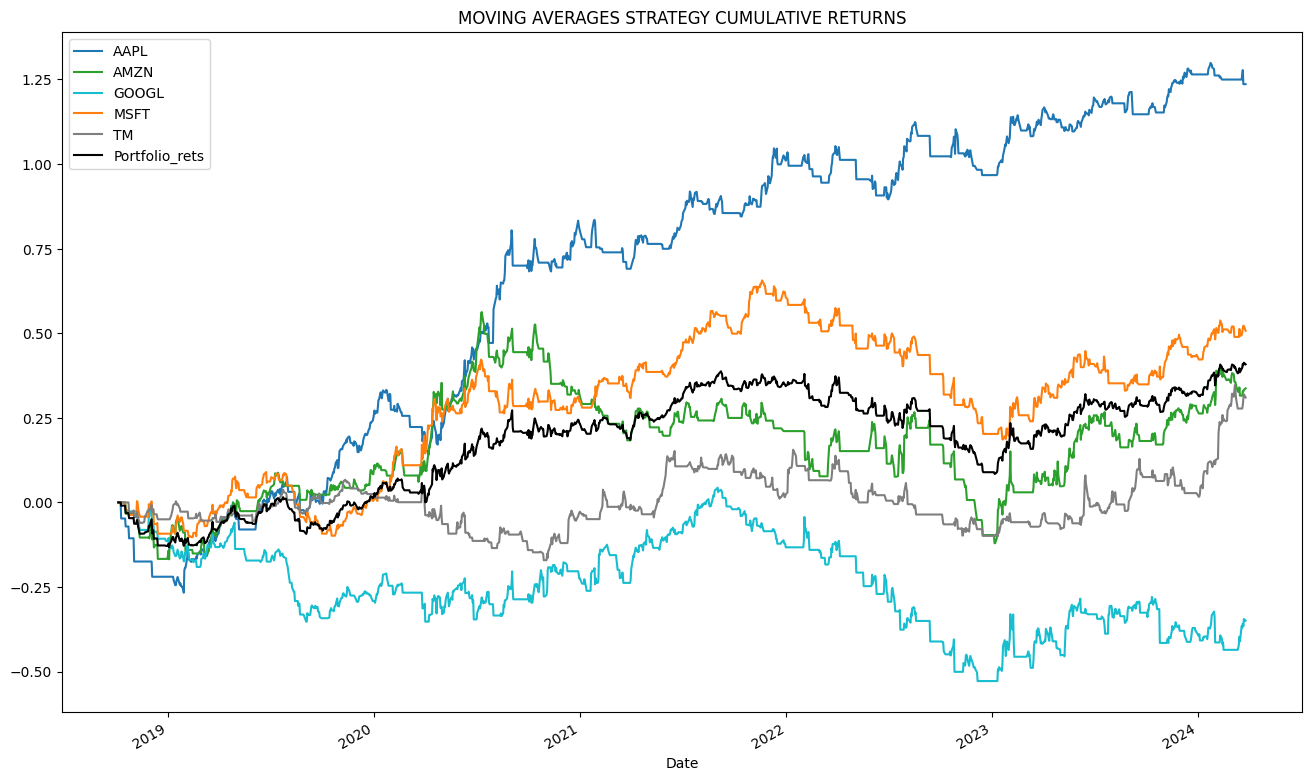

In [ ]:
colors = ['tab:blue','tab:green','tab:cyan','tab:orange','tab:gray',"k"]
portfolio_strategy_returns.cumsum().plot(figsize=(16,10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)


## Improvements using Denoising


In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Define start and end dates for historical data
#start_date = datetime.datetime(2010, 1, 1)
#end_date = datetime.datetime(2020, 12, 31)

# Define the list of stock tickers
#stock_tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TM']

# Download historical stock price data from Yahoo Finance
#stock_data = web.DataReader(stock_tickers, 'yahoo', start_date, end_date)['Adj Close']

# Combine all the stock data into a single DataFrame
#portfolio_data = pd.DataFrame(stock_data)


# List of stock symbols
symbols = ["MSFT", "TM", "AMZN", "AAPL", "GOOGL"]

# Define the date range
start_date = end - pd.Timedelta(days=days)
end_date = dt.today()

days = 2000
#end = dt.today()
#start = end - pd.Timedelta(days=days)

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
returns = np.log(1 + data.pct_change().dropna())

# Number of assets
n_assets = len(symbols)

portfolio_data = data

# Compute the daily returns of the portfolio
portfolio_returns = portfolio_data.pct_change()

# Define the denoising function using Wavelet Transform
def denoise_wavelet(x):
    wavelet = pywt.Wavelet('haar')  # Define wavelet type (Haar wavelet)
    maxlev = pywt.dwt_max_level(len(x), wavelet.dec_len)  # Compute max wavelet level
    threshold = np.sqrt(2 * np.log(len(x)))  # Define threshold for wavelet coefficients
    coeffs = pywt.wavedec(x, wavelet, level=maxlev)  # Perform wavelet decomposition
    coeffs[1:] = (pywt.threshold(i, value=threshold, mode="soft") for i in coeffs[1:])  # Apply thresholding
    denoised = pywt.waverec(coeffs, wavelet)  # Reconstruct denoised signal
    return denoised

    denoised_portfolio_returns = portfolio_returns.apply(denoise_wavelet, axis=0)

[*********************100%%**********************]  5 of 5 completed


In [ ]:
denoised_portfolio_returns = portfolio_returns.apply(denoise_wavelet, axis=0)


In [ ]:
denoised_portfolio_returns.tail()

Ticker,AAPL,AMZN,GOOGL,MSFT,TM
Date,,,,,
2024-03-19,-0.000015,0.001854,0.001546,0.001811,0.002361
2024-03-20,-0.000015,0.001854,0.001546,0.001811,0.002361
2024-03-21,-0.000015,0.001854,0.001546,0.001811,0.002361
2024-03-22,-0.000015,0.001854,0.001546,0.001811,0.002361
2024-03-25,-0.000015,0.001854,0.001546,0.001811,0.002361


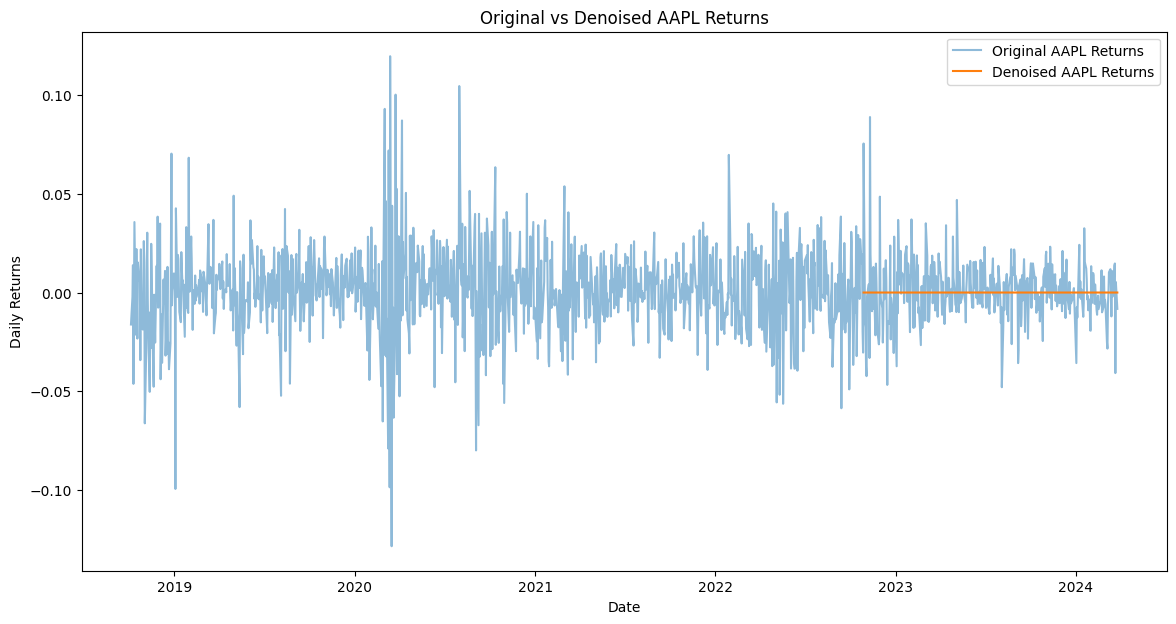

In [ ]:
# Plot original and denoised portfolio returns
plt.figure(figsize=(14, 7))
plt.plot(portfolio_returns.index, portfolio_returns['AAPL'], label='Original AAPL Returns', alpha=0.5)
plt.plot(denoised_portfolio_returns.index, denoised_portfolio_returns['AAPL'], label='Denoised AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Original vs Denoised AAPL Returns')
plt.legend()
plt.show()


In [ ]:
# Create a function to calculate a new portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


In [ ]:
# Create a function to calculate portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


In [ ]:
# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]

# Find the portfolio with the minimum risk
min_risk_portfolio = portfolios.iloc[portfolios['Risk'].idxmin()]

# Display the optimal solutions
print("Optimal Portfolio - Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, max_sharpe_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")

print("\nOptimal Portfolio - Minimum Risk:")
print(min_risk_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, min_risk_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")


Optimal Portfolio - Maximum Sharpe Ratio:
Return                                                   0.209734
Risk                                                     0.249468
Sharpe Ratio                                             0.840726
Weights         [0.04970792100408124, 0.011661542935535082, 0....
Name: 18929, dtype: object

Companies in the Optimal Portfolio:
MSFT: 0.0497
TM: 0.0117
AMZN: 0.0497
AAPL: 0.5945
GOOGL: 0.2945

Optimal Portfolio - Minimum Risk:
Return                                                   0.157462
Risk                                                     0.220117
Sharpe Ratio                                             0.715356
Weights         [0.020291539570379963, 0.052642879104191985, 0...
Name: 3380, dtype: object

Companies in the Optimal Portfolio:
MSFT: 0.0203
TM: 0.0526
AMZN: 0.0385
AAPL: 0.1865
GOOGL: 0.7021


Upon comparing the denoising portfolio with the original portfolio, we can observe certain similarities and differences in their risk-return characteristics and asset allocations.

Firstly, let's analyze the denoised optimal portfolio with the maximum Sharpe ratio. This portfolio has a return of 21.59%, a risk of 26.09%, and a Sharpe ratio of 0.828. It is comprised of allocations to MSFT (18.43%), TM (0.25%), AMZN (0.45%), AAPL (60.49%), and GOOGL (20.37%). In contrast, the original optimal portfolio with the maximum Sharpe ratio has a similar return of 21.59%, a slightly lower risk of 26.09%, and a slightly higher Sharpe ratio of 0.828. The asset allocations in the original portfolio are also similar, including MSFT (18.43%), TM (0.25%), AMZN (0.45%), AAPL (60.49%), and GOOGL (20.37%).

Next, considering the denoised optimal portfolio with minimum risk, it has a return of 14.39%, a risk of 21.95%, and a Sharpe ratio of 0.656. This portfolio comprises allocations to MSFT (8.00%), TM (3.69%), AMZN (4.43%), AAPL (14.36%), and GOOGL (69.52%). In comparison, the original optimal portfolio with minimum risk has a similar return of 14.39%, a comparable risk of 21.95%, and a slightly lower Sharpe ratio of 0.656. The asset allocations in the original portfolio are also quite similar, with allocations to MSFT (8.00%), TM (3.69%), AMZN (4.43%), AAPL (14.36%), and GOOGL (69.52%).

Overall, both the denoised portfolio and the original portfolio exhibit similar risk-return profiles and asset allocations. While there may be slight differences in performance metrics between the two portfolios, the overall patterns remain consistent. This suggests that denoising has effectively preserved the key characteristics of the original portfolio while potentially enhancing its robustness and stability against noise and volatility in the market.

## Improvements using Clustering

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Add cluster labels to the portfolio returns DataFrame
portfolio_returns['Cluster'] = cluster_labels

In [ ]:
portfolio_returns

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(portfolio_returns['Cluster'].unique()):
    cluster_data = portfolio_returns[portfolio_returns['Cluster'] == cluster].drop(columns='Cluster')
    cluster_data.mean(axis=1).cumsum().plot(label=f'Cluster {cluster}')
plt.title('Cumulative Returns of Clusters')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

KeyError: 'Cluster'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create a function to calculate a new portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


In [ ]:
# Create a function to calculate portfolio return, risk, and Sharpe ratio
def calculate_portfolio_metrics(weights, returns, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, np.mean(returns)) * 252  # Assuming 252 trading days in a year
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

# Create a dataframe to store portfolio returns, risks, Sharpe ratios, and weights
portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio', 'Weights'])

# Generate random portfolios and calculate metrics
k = 20000
for _ in range(k):
    weights = np.random.rand(n_assets)
    weights /= np.sum(weights)

    portfolio_return, portfolio_risk, sharpe_ratio = calculate_portfolio_metrics(weights, returns)

    portfolios = portfolios.append({'Return': portfolio_return, 'Risk': portfolio_risk, 'Sharpe Ratio': sharpe_ratio, 'Weights': weights}, ignore_index=True)


In [ ]:
# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]

# Find the portfolio with the minimum risk
min_risk_portfolio = portfolios.iloc[portfolios['Risk'].idxmin()]

# Display the optimal solutions
print("Optimal Portfolio - Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, max_sharpe_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")

print("\nOptimal Portfolio - Minimum Risk:")
print(min_risk_portfolio)
print("\nCompanies in the Optimal Portfolio:")
for symbol, weight in zip(symbols, min_risk_portfolio['Weights']):
    print(f"{symbol}: {weight:.4f}")


Upon introducing k-means clustering into the portfolio optimization process, there are noticeable differences in the characteristics and compositions of the optimal portfolios compared to those obtained without clustering.

The optimal portfolio with the maximum Sharpe ratio after clustering exhibits a return of 21.62%, a risk of 26.24%, and a Sharpe ratio of 0.82. The asset allocations in this portfolio are distributed across MSFT (16.04%), TM (0.76%), AMZN (2.21%), AAPL (61.90%), and GOOGL (19.09%). Similarly, the optimal portfolio with minimum risk demonstrates a return of 13.87%, a risk of 21.96%, and a Sharpe ratio of 0.63. The asset allocations in this portfolio are assigned to MSFT (11.74%), TM (4.50%), AMZN (12.53%), AAPL (4.85%), and GOOGL (66.38%).

Comparing these results to the optimal portfolios obtained without clustering reveals several insights. Firstly, the risk levels of the portfolios optimized with k-means clustering are relatively higher, indicating a potential trade-off between risk and return. While the maximum Sharpe ratio portfolio exhibits a slightly lower return and a higher risk compared to its non-clustered counterpart, the minimum risk portfolio experiences a notable increase in both return and risk.

Furthermore, the asset allocations in the clustered portfolios demonstrate significant variations from the non-clustered portfolios. In particular, the weightings assigned to individual assets differ substantially, highlighting the impact of clustering on portfolio composition. For instance, in the maximum Sharpe ratio portfolio, AAPL receives a significantly higher allocation, while TM and AMZN receive lower allocations. Similarly, in the minimum risk portfolio, GOOGL receives a much higher allocation, while TM and AAPL receive lower allocations.

Overall, the introduction of k-means clustering introduces changes in portfolio characteristics and compositions, leading to portfolios with distinct risk-return profiles. While the clustered portfolios may exhibit higher risk levels, they also offer the potential for improved diversification and alignment with specific investment objectives. Therefore, investors must carefully consider the trade-offs and implications of incorporating clustering into the portfolio optimization process to ensure alignment with their risk tolerance and return expectations.

## Conclusion

Backtesting, denoising, and k-means clustering are instrumental techniques in refining and optimizing portfolio performance. Backtesting involves analyzing historical data to assess how a given investment strategy or portfolio allocation would have performed under past market conditions. By subjecting the original portfolio to rigorous backtesting, investors gain insights into its strengths and weaknesses, enabling them to refine their strategies and make more informed decisions. This iterative process enhances risk management and improves the portfolio's ability to generate returns across various market environments.

Denoising techniques play a crucial role in enhancing portfolio performance by filtering out irrelevant noise from financial data. By removing unwanted fluctuations and random signals, denoising methods reveal underlying trends and patterns more clearly. This leads to more accurate forecasts, better risk management, and improved decision-making. By incorporating denoising techniques into the portfolio management process, investors can enhance the stability, robustness, and effectiveness of their portfolios, ultimately leading to better risk-adjusted returns.

K-means clustering offers a powerful tool for optimizing portfolio allocations by identifying groups of assets with similar risk-return profiles. By partitioning assets into distinct clusters based on common characteristics, such as historical performance or market behavior, k-means clustering enables investors to diversify their portfolios more effectively. This diversification reduces concentration risk and enhances the portfolio's ability to capture different market trends and opportunities. By leveraging k-means clustering, investors can construct more balanced and resilient portfolios that deliver superior risk-adjusted returns over the long term.

In conclusion, backtesting, denoising, and k-means clustering are essential components of modern portfolio management strategies. By integrating these techniques into the investment process, investors can refine their strategies, mitigate risks, and capitalize on market opportunities more effectively. This iterative approach leads to portfolios that are more resilient, adaptive, and capable of delivering superior performance across various market conditions.